   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Slope (Coefficient): 0.018852486014366118
Intercept: -0.25606083037934696
R² Score: 0.05134032021109902


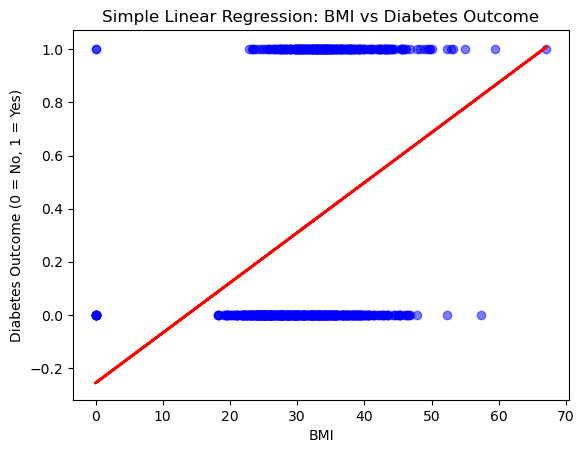

In [2]:
# Simple Linear Regression: BMI → Outcome (Diabetes likelihood)
# Dataset: diabetes.csv

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("./diabetes.csv")

# Display first few rows
print(df.head())

# Encode categorical columns if any
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])
        
# Select independent variable and target
X = df[["BMI"]]          # Independent variable
y = df["Outcome"]        # Dependent variable (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression results
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))

# Plot regression line
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel("BMI")
plt.ylabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.title("Simple Linear Regression: BMI vs Diabetes Outcome")
plt.show()
